In [ ]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

# WordCloud of Eminem Lyrics

In [23]:
import sys
import lyricsgenius
import collections
from collections import Counter
import os
from os import path
import pandas as pd
import json 
import numpy as np
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mishals/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Reading Data
file_path = path.relpath("files/Lyrics_Eminem.json")
d = json.load(open(file_path,'r'))
d.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'followers_count', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'iq', 'description_annotation', 'user', 'songs'])

In [5]:
#Filtering Data
songs = d['songs']
df = pd.DataFrame(songs)
#list(df.columns)
df = df[['title','lyrics']]

#pd.set_option('max_colwidth', 150) #Better view for dataframe
em = df[['lyrics']]
em

,lyrics
0,"[Intro]\n""Look, I was gonna go easy on you not to hurt your feelings.""\n""But I'm only going to get this one chance."" (Six minutes— Six minutes—)\n..."
1,"[Intro]\nYou sound like a bitch, bitch\nShut the fuck up\nWhen your fans become your haters\nYou done?\nFuckin' beard's weird\nAlright\nYou yellin..."
2,"[Intro]\nLook, if you had one shot or one opportunity\nTo seize everything you ever wanted in one moment\nWould you capture it, or just let it sli..."
3,"[Intro: Rihanna]\nI'm friends with the monster that's under my bed\nGet along with the voices inside of my head\nYou're tryin' to save me, stop ho..."
4,"[Intro: Joyner Lucas]\nWoah, Joyner, Joyner, yeah, yeah, yeah\n\n[Pre-Chorus: Joyner Lucas]\nYeah, I done did a lot of things in my day, I admit i..."
...,...
501,"[Intro: Eminem & Dina Rae]\nMhmmm *inhales*\nYou high, baby?\nYeah\nYeah?\nTalk to me\nYou want me to tell you something?\nUh-huh\nI know what you..."
502,"[Estribillo: Rihanna]\n\n¿Solo vas a quedarte ahí y verme arder?\nBueno, está bien, porque me gusta como duele\n¿Solo vas a quedarte ahí y me escu..."
503,"[Intro: Eminem]\nTak\nWięc chyba tak to jest, co?\nMyślę, że to oczywiste\nNigdy nie zobaczymy się oko w oko\nAle jest to zabawne\nTak bardzo, jak..."
504,"""Breaking news: Detroit rapper Eminem cancels his sold-out European tour to check himself into rehab after admitting an addiction to sleep medicat..."


In [6]:
#Cleaning Data

#Removing Punctuations
def rp(text):
    return  " ".join(re.findall("[a-zA-Z]+", text))

em['lyrics'] = em['lyrics'].apply(lambda x: rp(x))


#Removing Small Words (less than 3 letters)
def rsw(text):
    text = text.split(' ')
    text = [x for x in text if len(x)>3]
    return ' '.join(text)

em['lyrics'] = em['lyrics'].apply(lambda x: rsw(x))

#Lowercase
em['lyrics'] = em['lyrics'].apply(lambda x: x.lower())

#Removing Duplicates
em.drop_duplicates(keep=False, inplace=True)

em

,lyrics
0,intro look gonna easy hurt your feelings only going this chance minutes minutes something wrong feel minutes slim shady just feeling like somethin...
1,intro sound like bitch bitch shut fuck when your fans become your haters done fuckin beard weird alright yellin fuckin weird beard want smoke doin...
2,intro look shot opportunity seize everything ever wanted moment would capture just slip verse palms sweaty knees weak arms heavy there vomit sweat...
3,intro rihanna friends with monster that under along with voices inside head tryin save stop holdin your breath think crazy yeah think crazy verse ...
4,intro joyner lucas woah joyner joyner yeah yeah yeah chorus joyner lucas yeah done things admit take back what said then meant life want grammy pr...
...,...
499,this fake fucking prick ever this shit again ever blamed dont have enough just straight remove lyrics know your johns server fucking know yours tr...
500,verse eminem name eminem verse your name your name marshall mathers asshole
501,intro eminem dina mhmmm inhales high baby yeah yeah talk want tell something know what wanna hear refrain eminem dina cause know want baby think w...
502,estribillo rihanna solo quedarte verme arder bueno bien porque gusta como duele solo quedarte escucharas llorar bueno bien porque forma mientes fo...


In [7]:
#Setting and removing the Stopwords

file_path = path.relpath("files/sw.txt")
with open(file_path, 'r') as f:
    y = f.read().split('\n')
    
stop = set(stopwords.words("english"))
stop.update(y)

def rstw(text):
    text = text.split(' ')
    text = [x for x in text if x not in stop]
    return ' '.join(text)

em['lyrics'] = em['lyrics'].apply(lambda x: rstw(x))
em

,lyrics
0,look gonna easy hurt feelings going chance minutes minutes something wrong feel minutes slim shady feeling like something happen know means think ...
1,sound like shut fans become haters done beard weird alright yellin weird beard want smoke doin yellin beard weird yell illa rihanna text last nigh...
2,look shot opportunity seize everything ever wanted moment would capture slip palms sweaty knees weak arms heavy vomit sweater already spaghetti ne...
3,rihanna friends monster along voices inside head tryin save stop holdin breath think crazy think crazy eminem wanted fame cover newsweek well gues...
4,joyner lucas woah joyner joyner joyner lucas done things admit take back said meant life want grammy prolly never never trophy motherfuckin ribbon...
...,...
499,fake prick ever ever blamed dont enough straight remove lyrics know johns server know truly swirve
500,eminem name eminem name name marshall mathers asshole
501,eminem dina mhmmm inhales high talk want tell something know wanna hear refrain eminem dina know want think want think love think love save girl c...
502,estribillo rihanna solo quedarte verme arder bueno bien porque gusta como duele solo quedarte escucharas llorar bueno bien porque forma mientes fo...


##### Common Words

In [48]:
# Getting the Common Words

x = []
for song in em.iterrows():
    x += song[1]['lyrics'].split(' ')
    
topwords = Counter(x).most_common()
topwords[:5]

[('like', 2956),
 ('know', 1261),
 ('back', 1192),
 ('eminem', 1169),
 ('never', 785)]

In [46]:
top = topwords[:10]
top.reverse()
x , y = zip(*(top))

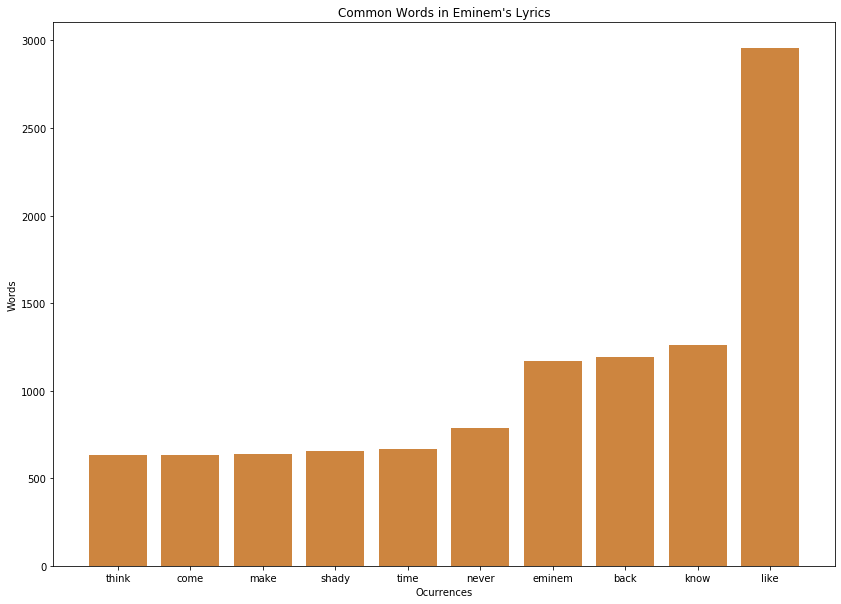

In [47]:
#Plot Bar Graph

plt.figure(figsize=(14, 10))
plt.bar(x, y, color = 'peru')

plt.title("Common Words in Eminem's Lyrics")
plt.xlabel('Ocurrences')
plt.ylabel('Words')
plt.show()

##### Word Cloud

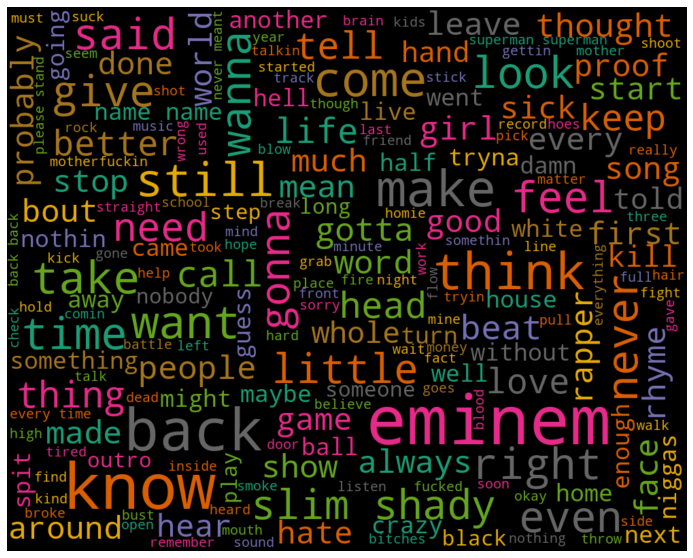

In [63]:
#Generating WordCloud
text = " ".join(twt for twt in em.lyrics)


#len(text)

wc= WordCloud(width=1000, height=800, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(text)

plt.figure(figsize = (14, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word clouds simply make the words that appear the most often the biggest. 

#### As you can see from the word cloud, the words that appear a lot in Eminem's lyrics are basic words because his lyrical vocabulary is amazingly vast and has variation of topics in his songs so the topic words and important words do not appear consistently on his lyrics